### Data Science and Machine Learning Toolkit
#### By: Sebastián Medina Jiménez 
https://www.linkedin.com/in/sebasmedina/
## 3.  Hyperparameter tuning





In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()

# Access the data and target variables
X = iris.data  # Features
y = iris.target  # Target variables

Adjust the pipeline  with :
1. Standard scaling
2. Imputer of missing data
3. Random forest classifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Standardization
    ('imputer', SimpleImputer()),      # Step 2: Impute missing data
    ('classifier', RandomForestClassifier())  # Step 3: Classification model
])

**Grid Search Cross-Validation (GridSearchCV) Explanation**

Grid Search Cross-Validation (GridSearchCV) is a technique used to find the best set of hyperparameters for a machine learning model. Hyperparameters are parameters of the model that are not learned from the data but need to be set before training, such as the learning rate, the number of estimators in an ensemble, or the maximum depth of a decision tree. GridSearchCV systematically evaluates different combinations of hyperparameters to determine the combination that results in the best model performance.

**Summary of the Provided Code**

1. The code begins by importing necessary libraries, loading the Iris dataset, and splitting it into training and testing sets.

2. A machine learning pipeline is created. It consists of three main steps:
   - **Step 1: Standardization**: The features are standardized using the StandardScaler.
   - **Step 2: Imputation**: Missing data is imputed using SimpleImputer.
   - **Step 3: Classification Model**: The Random Forest Classifier is used as the classification model.

3. Grid Search is set up to explore different hyperparameter combinations for the Random Forest Classifier within the pipeline. Hyperparameters include the number of estimators, maximum depth, and minimum samples to split.

4. Grid Search is fitted to the training data, where it performs cross-validation to evaluate each combination of hyperparameters and determine the best combination based on a scoring metric, which is accuracy in this case.

5. The code extracts the best hyperparameters and the best model obtained from the grid search.

6. Predictions are made on the test data using the best model.

7. The code calculates and prints the confusion matrix, accuracy, precision, and recall for the best model.

8. Lastly, a horizontal bar chart is created to visualize the mean test scores (accuracy) for different hyperparameter combinations, providing insights into how different hyperparameters impact model performance.


Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Confusion Matrix (Best Model):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy (Best Model): 100.00%
Precision (Best Model): 1.00
Recall (Best Model): 1.00


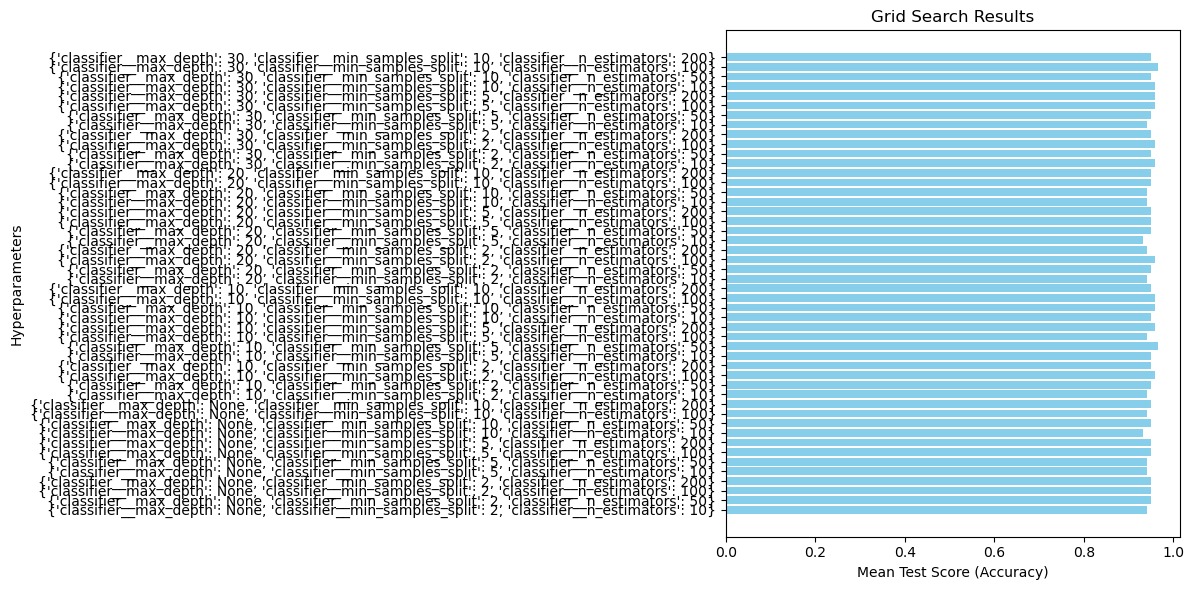

In [3]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_estimator.predict(X_test)

# Calculate the confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Calculate accuracy, precision, and recall for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')

# Print the best hyperparameters and metrics
print("Best Hyperparameters:", best_params)
print("Confusion Matrix (Best Model):\n", conf_matrix_best)
print("Accuracy (Best Model): {:.2f}%".format(accuracy_best * 100))
print("Precision (Best Model): {:.2f}".format(precision_best))
print("Recall (Best Model): {:.2f}".format(recall_best))

# Plot the metrics for different models
param_values = [str(params) for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(12, 6))
plt.barh(param_values, mean_test_scores, color='skyblue')
plt.xlabel('Mean Test Score (Accuracy)')
plt.ylabel('Hyperparameters')
plt.title('Grid Search Results')
plt.tight_layout()

plt.show()


In this plot  we can see that  different hyper patameters  give  as different accuracies, so here is the importance  of  selecting  good hyper parameters